In [160]:
f = open('./Downloads/Criteo_Conversion_Search/CriteoSearchData')

In [161]:
data = []
data_cnt = 1500000
while data_cnt:
    line = f.readline()
    if not line:
        f.close()
        print('end')
        break
    data.append(line.split('\t'))
    data_cnt -= 1
    
print(len(data))

1500000


In [162]:
train_data, test_data = data[:1000000], data[1000000:]
print(len(train_data), len(test_data))

1000000 500000


'sales, _(1), _(2), click_timestamp, np_click_1week, product_price, product_age_group, device_type, audience_id, product_gender, product,brand, product_category(1), product_category(2), product_category(3), product_category(4), product_category(5), product_category(6), product_category(7), product_country, product_id, product_title, partner_id, user_id'

In [163]:
labels = 'Sales, SalesAmountInEuro, Time_delay_for_conversion, click_timestamp, np_click_1week, product_price, product_age_group, device_type, audience_id, product_gender, product_brand, product_category(1), product_category(2), product_category(3), product_category(4), product_category(5), product_category(6), product_category(7), product_country, product_id, product_title, partner_id, user_id'.split(', ')

In [164]:
train_df = {l:[] for l in labels}
test_df = {l:[] for l in labels}

print(len(train_data), len(test_data))

for i, label in enumerate(labels):
    non_value = '-1'
    if label=='click_timestamp':
        non_value = '0'
        
    for d in train_data:
        if d[i] == non_value:
            d[i] = None
        elif d[i].isdigit() or '.' in d[i]:
            d[i] = int(float(d[i]))
        train_df[label].append(d[i])
    for d in test_data:
        if d[i] == non_value:
            d[i] = None
        elif d[i].isdigit() or '.' in d[i]:
            d[i] = int(float(d[i]))
        test_df[label].append(d[i])

import pandas as pd
print(len(train_data), len(test_data))
train_df = pd.DataFrame(train_df)
test_df = pd.DataFrame(test_df)

1000000 500000
1000000 500000


In [165]:
train_df

,Sales,SalesAmountInEuro,Time_delay_for_conversion,click_timestamp,np_click_1week,product_price,product_age_group,device_type,audience_id,product_gender,...,product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,partner_id,user_id
0,0,NaN,NaN,1598891820,NaN,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,A66DB02AC1726A8D79C518B7F7AB79F0,None,E3DDEB04F8AFF944B11943BB57D2F620,493CFB4A87C50804C94C0CF76ABD19CD\n
1,0,NaN,NaN,1598925284,0.0,0,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,None,1B491180398E2F0390E6A588B3BCE291,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,4C6C62203B4CE5AA6DFCF17F2604DC37,3CE3D1623D32FB2A901822910AF72A0B C83584C673752...,BD01BAFAE73CF38C403978BBB458300C,D0EBCD4402172AE3AA6FD21FB77BDE84\n
2,0,NaN,NaN,1598892568,NaN,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,...,None,None,None,None,None,None,None,None,C4D189327BD87FEB3BF896DA716C6995,E8A8BEA257B19574C36108D0F0CDADE5\n
3,0,NaN,NaN,1598891174,NaN,0,None,D7D1FB49049702BF6338894757E0D959,B0E6BD3ACC0707BAB31CA2C2B08E652F,None,...,None,None,None,None,None,None,None,None,440255DF62CFD36FBC0206828FC488E0,9703077BD18F430BD232A6F74931928E\n
4,0,NaN,NaN,1598905245,NaN,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,5F4AFF2693601C2EFFE9AF2C1ED4222E,None,E3DDEB04F8AFF944B11943BB57D2F620,703B8CFC8D65A67BDF96595CCF992D27\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,55.0,1689.0,1597179878,114.0,27,None,7E56C27BFF0305E788DA55A029EC4988,None,None,...,A499E9AAE46A39789A2EB2C7F844B9EC,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,A259A936D7273358BBCCE1440AF6011E,A8DE3C5AEC68CD05E766D08A639F7663 AE003E6EFD15B...,E3DDEB04F8AFF944B11943BB57D2F620,EF782BEB11E2924308F4334F84700421\n
999996,0,NaN,NaN,1597203004,NaN,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,0BA69ABC322BF4C153CA5A63507A5B94,None,E3DDEB04F8AFF944B11943BB57D2F620,30D8D764E5C80611CAA0CD0E9227359A\n
999997,1,102.0,692.0,1597205953,NaN,100,None,7E56C27BFF0305E788DA55A029EC4988,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,4E7A8170ACC66F43F6E21EA5426C459D,None,E3DDEB04F8AFF944B11943BB57D2F620,3FF4E389EE4E8F05739EA9CE29987411\n
999998,0,NaN,NaN,1597164316,NaN,0,None,D7D1FB49049702BF6338894757E0D959,951795EB43464C86FB534742A58D99FB,None,...,BCCC1BBBA27989E192D26A0DA25E448E,130539907160BE09230361DD99EF9B38,None,None,None,57A1D462A03BD076E029CF9310C11FC5,E0E57033F529929E6618F80F551C162C,,1E497AFE8EF3848C96D69635B1225D21,1F32C8E3411A7DDADDD82219728D1867\n


In [166]:
test_df

,Sales,SalesAmountInEuro,Time_delay_for_conversion,click_timestamp,np_click_1week,product_price,product_age_group,device_type,audience_id,product_gender,...,product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,partner_id,user_id
0,0,NaN,NaN,1597182873,0.0,0,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,D995C8180208396742F8F2D7563B1C7C,A5D15FC386510762EC0DDFF54ABE6F94,...,F9747CEFDB3A6C5D36A658250DD01EB5,BC8278B1513D2A376E6BCD691D480E4F,None,None,None,57A1D462A03BD076E029CF9310C11FC5,99EA4B1EB9A40C319A4572632EF7BC02,B7D62FF3BB5EF9A9C56B64BF73357F03 8A9FBF819495B...,919377389312B4EE6C56FD94A6997C16,5E1A37F0048915A9FFF05AE08D17AD38\n
1,0,NaN,NaN,1597167612,144.0,0,921B36149E5B081FD24450BFE2CE4430,7E56C27BFF0305E788DA55A029EC4988,8500AD0D4542BD1EB7ABDF37F09056F8,A5D15FC386510762EC0DDFF54ABE6F94,...,8A0B9EDE4A9C1BEAA1BA74742AE92999,None,None,None,None,D963E3BCE149E71F5D5E3000DCF68A9F,A758C4359BD4D1DD32C85C6C6F470227,8B698195738EFBA10DB86CEC7642E72B 71E7618350873...,F122B91F6D102E4630817566839A4F1F,78AD2DA5FC7B3B3B6F7203BC355219A0\n
2,0,NaN,NaN,1597181084,NaN,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,BCB218D5009CD4571DB8FF3BB31F7033,None,E3DDEB04F8AFF944B11943BB57D2F620,D5AC6B10EC9F020C2A4EDA977A811D53\n
3,0,NaN,NaN,1597183434,NaN,0,None,D7D1FB49049702BF6338894757E0D959,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,1DF25FA787D6100F5E6B839B6204D4FB,None,E3DDEB04F8AFF944B11943BB57D2F620,67D4D79FBDE9642D7C1ADC82CD8F78BE\n
4,0,NaN,NaN,1597134374,1.0,0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,3286F428FAD08B49985AC4CB0F8EE8DF,1B491180398E2F0390E6A588B3BCE291,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,A226A56E037C707ACEE1E8B4C1130714,BBFC4AF224D2AE99AC9C0C6AF6770CBD FBAAD2DCF7734...,7BEB265403E02F6BD743E21C58566559,99A086965680F6E49078B8820163B0DB\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,NaN,NaN,1600596925,7.0,0,None,7E56C27BFF0305E788DA55A029EC4988,1CF5228200C78E2E1A9A5C810D77988D,None,...,BCCC1BBBA27989E192D26A0DA25E448E,130539907160BE09230361DD99EF9B38,None,None,None,F47588BE654E207435633B072A9D69BC,CDE6525AA009CD7D962E07B070ECC7B3,9D36F93C99AE4D60DC07A459C5F95939 BC7DB116DDB02...,D7B32C1E2595E415F0E3C6A9D1B9D9BF,ED7B28A84685C920FFBA0A23D2CB3ABB\n
499996,0,NaN,NaN,1600627202,302.0,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,...,1E629AECC2FB9BEF43331CBE8F2D7C08,877DB7A00399FEA0A52E64899A95DA9E,724EEDA950B27E8C85D77149D0B74B58,DAF951A96058293CEA9B18073EDC0E18,None,989EEF92F2A525DD896557425EA7C4C7,9864F83638C71E7C17DD8682E37E6905,6D5CE5C0F731FA033BCF8F6EEC96ED02 D20B31A968203...,3B4AAA4CE81BF8DE122915672418824D,B360877EB04EF5FA3609101E73738241\n
499997,0,NaN,NaN,1600660477,NaN,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,...,None,None,None,None,None,None,None,None,B147144A978F3AFBA50CF343F2D668A2,BC709674B22350AF0D93F2B0BB29426A\n
499998,0,NaN,NaN,1600602463,0.0,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,...,E024AD4AAD0BFC3DBC319351B1DA0A0A,E271C8DB1E11A43928FFA6BECBF713FE,352F46BE455C3856029AB197A4361404,None,None,2AC62132FBCFA093B9426894A4BC6278,FAA16641D13CB3167207A042E7A69B17,C2BA17D1349609EE5F21B688F85F02AA E0125A52D02FB...,4AE4624001361775D6E51D5698147C37,F8F1AFB7ECB20B0E3D72763A23EC3122\n


In [167]:
train_df.drop('SalesAmountInEuro', axis=1, inplace=True)
test_df.drop('SalesAmountInEuro', axis=1, inplace=True)
train_df.drop('Time_delay_for_conversion', axis=1, inplace=True)
test_df.drop('Time_delay_for_conversion', axis=1, inplace=True)

In [168]:
train_df.isnull().sum()

Sales                       0
click_timestamp             0
np_click_1week         425231
product_price               0
product_age_group      735462
device_type               177
audience_id            714461
product_gender         727508
product_brand          440251
product_category(1)    382751
product_category(2)    383185
product_category(3)    457748
product_category(4)    656148
product_category(5)    912709
product_category(6)    983076
product_category(7)    999990
product_country        233152
product_id             232878
product_title          382751
partner_id                  0
user_id                     0
dtype: int64

In [169]:
test_df.isnull().sum()

Sales                       0
click_timestamp             0
np_click_1week         216878
product_price               0
product_age_group      372133
device_type                94
audience_id            359981
product_gender         369367
product_brand          239821
product_category(1)    200475
product_category(2)    200681
product_category(3)    236721
product_category(4)    332725
product_category(5)    456960
product_category(6)    491812
product_category(7)    499998
product_country        118197
product_id             117999
product_title          200475
partner_id                  0
user_id                     0
dtype: int64

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

def bar_chart(feature):
    saled = train_df[train_df['Sales']==1][feature].value_counts()
    not_saled = train_df[train_df['Sales']==0][feature].value_counts()
    df = pd.DataFrame([saled, not_saled])
    df.index = ['Saled', 'Not Saled']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

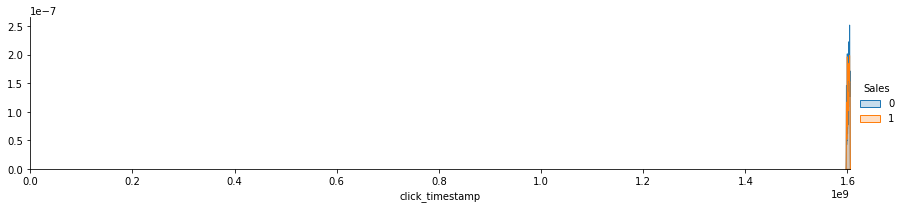

In [171]:
import seaborn as sns

facet = sns.FacetGrid(train_df, hue='Sales', aspect=4)
facet.map(sns.kdeplot, 'click_timestamp', shade=True)
facet.set(xlim=(0, train_df['click_timestamp'].max()))
facet.add_legend()

plt.show()

(1596439471.0, 1604301869.0)

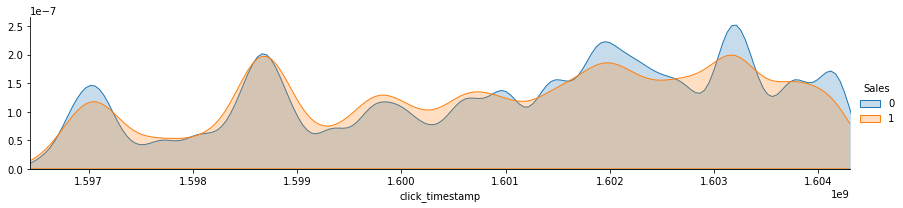

In [172]:
facet = sns.FacetGrid(train_df, hue='Sales', aspect=4)
facet.map(sns.kdeplot, 'click_timestamp', shade=True)
facet.set(xlim=(0, train_df['click_timestamp'].max()))
facet.add_legend()
plt.xlim(1596439471.0, 1604301869.0)

(1600739471.0, 1601301869.0)

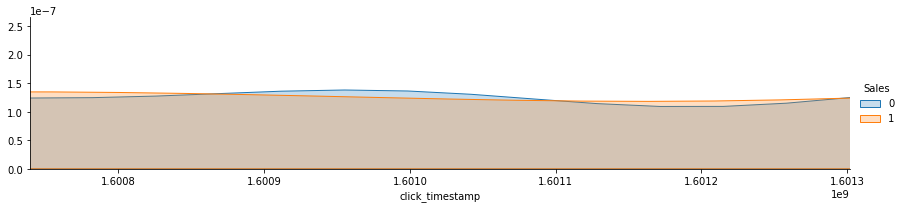

In [173]:
facet = sns.FacetGrid(train_df, hue='Sales', aspect=4)
facet.map(sns.kdeplot, 'click_timestamp', shade=True)
facet.set(xlim=(0, train_df['click_timestamp'].max()))
facet.add_legend()
plt.xlim(1600739471.0, 1601301869.0)

In [174]:
click_timestamp_cut = 1600900000

In [175]:
train_df.loc[train_df['click_timestamp'] < click_timestamp_cut, 'click_timestamp'] = 0
train_df.loc[train_df['click_timestamp'] >= click_timestamp_cut, 'click_timestamp'] = 1

In [176]:
train_df

,Sales,click_timestamp,np_click_1week,product_price,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),...,product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,partner_id,user_id
0,0,0,NaN,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,A66DB02AC1726A8D79C518B7F7AB79F0,None,E3DDEB04F8AFF944B11943BB57D2F620,493CFB4A87C50804C94C0CF76ABD19CD\n
1,0,0,0.0,0,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,None,1B491180398E2F0390E6A588B3BCE291,3CE3D1623D32FB2A901822910AF72A0B,033E492229C2222EFAA16EE8A6462D8B,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,4C6C62203B4CE5AA6DFCF17F2604DC37,3CE3D1623D32FB2A901822910AF72A0B C83584C673752...,BD01BAFAE73CF38C403978BBB458300C,D0EBCD4402172AE3AA6FD21FB77BDE84\n
2,0,0,NaN,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,None,None,...,None,None,None,None,None,None,None,None,C4D189327BD87FEB3BF896DA716C6995,E8A8BEA257B19574C36108D0F0CDADE5\n
3,0,0,NaN,0,None,D7D1FB49049702BF6338894757E0D959,B0E6BD3ACC0707BAB31CA2C2B08E652F,None,None,None,...,None,None,None,None,None,None,None,None,440255DF62CFD36FBC0206828FC488E0,9703077BD18F430BD232A6F74931928E\n
4,0,0,NaN,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,5F4AFF2693601C2EFFE9AF2C1ED4222E,None,E3DDEB04F8AFF944B11943BB57D2F620,703B8CFC8D65A67BDF96595CCF992D27\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,0,114.0,27,None,7E56C27BFF0305E788DA55A029EC4988,None,None,None,B4B45C6CE5FC4DE45AB02974D8849DBD,...,A499E9AAE46A39789A2EB2C7F844B9EC,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,A259A936D7273358BBCCE1440AF6011E,A8DE3C5AEC68CD05E766D08A639F7663 AE003E6EFD15B...,E3DDEB04F8AFF944B11943BB57D2F620,EF782BEB11E2924308F4334F84700421\n
999996,0,0,NaN,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,0BA69ABC322BF4C153CA5A63507A5B94,None,E3DDEB04F8AFF944B11943BB57D2F620,30D8D764E5C80611CAA0CD0E9227359A\n
999997,1,0,NaN,100,None,7E56C27BFF0305E788DA55A029EC4988,None,None,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,4E7A8170ACC66F43F6E21EA5426C459D,None,E3DDEB04F8AFF944B11943BB57D2F620,3FF4E389EE4E8F05739EA9CE29987411\n
999998,0,0,NaN,0,None,D7D1FB49049702BF6338894757E0D959,951795EB43464C86FB534742A58D99FB,None,None,62D6A49514020FA0B2E434DB0B506005,...,BCCC1BBBA27989E192D26A0DA25E448E,130539907160BE09230361DD99EF9B38,None,None,None,57A1D462A03BD076E029CF9310C11FC5,E0E57033F529929E6618F80F551C162C,,1E497AFE8EF3848C96D69635B1225D21,1F32C8E3411A7DDADDD82219728D1867\n


In [177]:
test_df.loc[test_df['click_timestamp'] < click_timestamp_cut, 'click_timestamp'] = 0
test_df.loc[test_df['click_timestamp'] >= click_timestamp_cut, 'click_timestamp'] = 1

In [178]:
test_df

,Sales,click_timestamp,np_click_1week,product_price,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),...,product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,partner_id,user_id
0,0,0,0.0,0,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,D995C8180208396742F8F2D7563B1C7C,A5D15FC386510762EC0DDFF54ABE6F94,1CF43E94B0421089AE4EF3E598C192FD,62D6A49514020FA0B2E434DB0B506005,...,F9747CEFDB3A6C5D36A658250DD01EB5,BC8278B1513D2A376E6BCD691D480E4F,None,None,None,57A1D462A03BD076E029CF9310C11FC5,99EA4B1EB9A40C319A4572632EF7BC02,B7D62FF3BB5EF9A9C56B64BF73357F03 8A9FBF819495B...,919377389312B4EE6C56FD94A6997C16,5E1A37F0048915A9FFF05AE08D17AD38\n
1,0,0,144.0,0,921B36149E5B081FD24450BFE2CE4430,7E56C27BFF0305E788DA55A029EC4988,8500AD0D4542BD1EB7ABDF37F09056F8,A5D15FC386510762EC0DDFF54ABE6F94,8B698195738EFBA10DB86CEC7642E72B,E02400CDAD96905D88E932FE9B7D3552,...,8A0B9EDE4A9C1BEAA1BA74742AE92999,None,None,None,None,D963E3BCE149E71F5D5E3000DCF68A9F,A758C4359BD4D1DD32C85C6C6F470227,8B698195738EFBA10DB86CEC7642E72B 71E7618350873...,F122B91F6D102E4630817566839A4F1F,78AD2DA5FC7B3B3B6F7203BC355219A0\n
2,0,0,NaN,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,BCB218D5009CD4571DB8FF3BB31F7033,None,E3DDEB04F8AFF944B11943BB57D2F620,D5AC6B10EC9F020C2A4EDA977A811D53\n
3,0,0,NaN,0,None,D7D1FB49049702BF6338894757E0D959,None,None,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,1DF25FA787D6100F5E6B839B6204D4FB,None,E3DDEB04F8AFF944B11943BB57D2F620,67D4D79FBDE9642D7C1ADC82CD8F78BE\n
4,0,0,1.0,0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,3286F428FAD08B49985AC4CB0F8EE8DF,1B491180398E2F0390E6A588B3BCE291,3C583E0C515719DE5DB989D267B760EF,033E492229C2222EFAA16EE8A6462D8B,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,A226A56E037C707ACEE1E8B4C1130714,BBFC4AF224D2AE99AC9C0C6AF6770CBD FBAAD2DCF7734...,7BEB265403E02F6BD743E21C58566559,99A086965680F6E49078B8820163B0DB\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,7.0,0,None,7E56C27BFF0305E788DA55A029EC4988,1CF5228200C78E2E1A9A5C810D77988D,None,63877D8D5B03DBA1CD605C6A61809DC5,62D6A49514020FA0B2E434DB0B506005,...,BCCC1BBBA27989E192D26A0DA25E448E,130539907160BE09230361DD99EF9B38,None,None,None,F47588BE654E207435633B072A9D69BC,CDE6525AA009CD7D962E07B070ECC7B3,9D36F93C99AE4D60DC07A459C5F95939 BC7DB116DDB02...,D7B32C1E2595E415F0E3C6A9D1B9D9BF,ED7B28A84685C920FFBA0A23D2CB3ABB\n
499996,0,0,302.0,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,6D5CE5C0F731FA033BCF8F6EEC96ED02,13C26D10258053889D75D9B9CA922EC7,...,1E629AECC2FB9BEF43331CBE8F2D7C08,877DB7A00399FEA0A52E64899A95DA9E,724EEDA950B27E8C85D77149D0B74B58,DAF951A96058293CEA9B18073EDC0E18,None,989EEF92F2A525DD896557425EA7C4C7,9864F83638C71E7C17DD8682E37E6905,6D5CE5C0F731FA033BCF8F6EEC96ED02 D20B31A968203...,3B4AAA4CE81BF8DE122915672418824D,B360877EB04EF5FA3609101E73738241\n
499997,0,0,NaN,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,None,None,...,None,None,None,None,None,None,None,None,B147144A978F3AFBA50CF343F2D668A2,BC709674B22350AF0D93F2B0BB29426A\n
499998,0,0,0.0,0,None,7E56C27BFF0305E788DA55A029EC4988,None,None,8A975F5E16CB4965E1EB939E39F53129,62D6A49514020FA0B2E434DB0B506005,...,E024AD4AAD0BFC3DBC319351B1DA0A0A,E271C8DB1E11A43928FFA6BECBF713FE,352F46BE455C3856029AB197A4361404,None,None,2AC62132FBCFA093B9426894A4BC6278,FAA16641D13CB3167207A042E7A69B17,C2BA17D1349609EE5F21B688F85F02AA E0125A52D02FB...,4AE4624001361775D6E51D5698147C37,F8F1AFB7ECB20B0E3D72763A23EC3122\n


In [179]:
train_df['device_type'].value_counts()

7E56C27BFF0305E788DA55A029EC4988    546756
D7D1FB49049702BF6338894757E0D959    373450
FF2C446555E3822B0E0FC3406116E86D     79451
B432A885981287B47E08B41E802860B2       129
0C297EB7365042A7DCB803298164359F        36
1D2373C2A02F5A307C1F0C697ECF8429         1
Name: device_type, dtype: int64

In [180]:
device_type_mapping = {'7E56C27BFF0305E788DA55A029EC4988':1, 'D7D1FB49049702BF6338894757E0D959':2, 'FF2C446555E3822B0E0FC3406116E86D':3, 'B432A885981287B47E08B41E802860B2':3,'0C297EB7365042A7DCB803298164359F':3,'1D2373C2A02F5A307C1F0C697ECF8429':3}

In [181]:
test_df['device_type'].value_counts()

7E56C27BFF0305E788DA55A029EC4988    271614
D7D1FB49049702BF6338894757E0D959    187989
FF2C446555E3822B0E0FC3406116E86D     40222
B432A885981287B47E08B41E802860B2        70
0C297EB7365042A7DCB803298164359F        10
1D2373C2A02F5A307C1F0C697ECF8429         1
Name: device_type, dtype: int64

In [182]:
train_df['device_type'] = train_df['device_type'].map(device_type_mapping)

In [183]:
test_df['device_type'] = test_df['device_type'].map(device_type_mapping)

In [184]:
train_df['device_type'] = train_df['device_type'].fillna(1)
test_df['device_type'] = test_df['device_type'].fillna(1)

<AxesSubplot:>

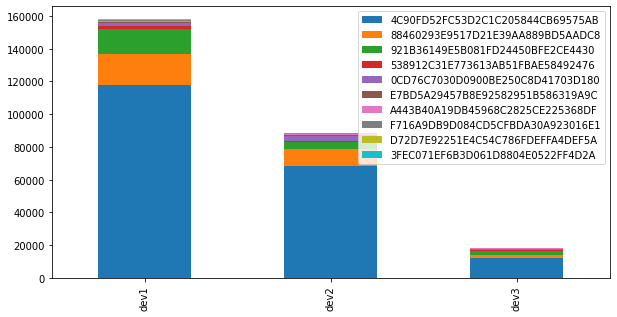

In [185]:
dev1 = train_df[train_df['device_type']==1]['product_age_group'].value_counts()
dev2 = train_df[train_df['device_type']==2]['product_age_group'].value_counts()
dev3 = train_df[train_df['device_type']==3]['product_age_group'].value_counts()
df = pd.DataFrame([dev1, dev2, dev3])
df.index = ['dev1', 'dev2','dev3']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [195]:
train_df.loc[train_df['product_price'] == 0, 'product_price'] = 0
train_df.loc[train_df['product_price'] > 0, 'product_price'] = 1

In [187]:
train_df['device_type'].value_counts()

1.0    546933
2.0    373450
3.0     79617
Name: device_type, dtype: int64

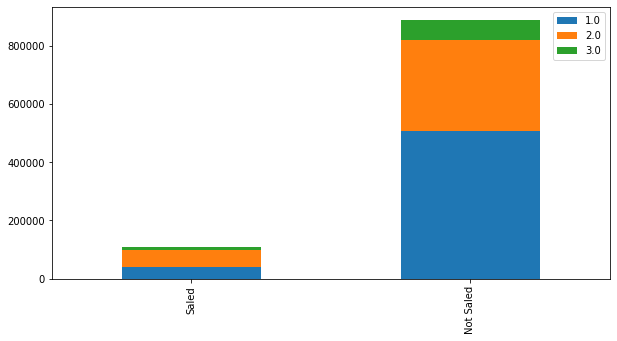

In [188]:
bar_chart('device_type')

In [196]:
train_df

,Sales,click_timestamp,np_click_1week,product_price,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),...,product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,partner_id,user_id
0,0,0,NaN,0,None,1.0,None,None,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,A66DB02AC1726A8D79C518B7F7AB79F0,None,E3DDEB04F8AFF944B11943BB57D2F620,493CFB4A87C50804C94C0CF76ABD19CD\n
1,0,0,0.0,0,4C90FD52FC53D2C1C205844CB69575AB,2.0,None,1B491180398E2F0390E6A588B3BCE291,3CE3D1623D32FB2A901822910AF72A0B,033E492229C2222EFAA16EE8A6462D8B,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,4C6C62203B4CE5AA6DFCF17F2604DC37,3CE3D1623D32FB2A901822910AF72A0B C83584C673752...,BD01BAFAE73CF38C403978BBB458300C,D0EBCD4402172AE3AA6FD21FB77BDE84\n
2,0,0,NaN,0,None,1.0,None,None,None,None,...,None,None,None,None,None,None,None,None,C4D189327BD87FEB3BF896DA716C6995,E8A8BEA257B19574C36108D0F0CDADE5\n
3,0,0,NaN,0,None,2.0,B0E6BD3ACC0707BAB31CA2C2B08E652F,None,None,None,...,None,None,None,None,None,None,None,None,440255DF62CFD36FBC0206828FC488E0,9703077BD18F430BD232A6F74931928E\n
4,0,0,NaN,0,None,1.0,None,None,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,5F4AFF2693601C2EFFE9AF2C1ED4222E,None,E3DDEB04F8AFF944B11943BB57D2F620,703B8CFC8D65A67BDF96595CCF992D27\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,0,114.0,1,None,1.0,None,None,None,B4B45C6CE5FC4DE45AB02974D8849DBD,...,A499E9AAE46A39789A2EB2C7F844B9EC,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,A259A936D7273358BBCCE1440AF6011E,A8DE3C5AEC68CD05E766D08A639F7663 AE003E6EFD15B...,E3DDEB04F8AFF944B11943BB57D2F620,EF782BEB11E2924308F4334F84700421\n
999996,0,0,NaN,0,None,1.0,None,None,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,0BA69ABC322BF4C153CA5A63507A5B94,None,E3DDEB04F8AFF944B11943BB57D2F620,30D8D764E5C80611CAA0CD0E9227359A\n
999997,1,0,NaN,1,None,1.0,None,None,None,None,...,None,None,None,None,None,57A1D462A03BD076E029CF9310C11FC5,4E7A8170ACC66F43F6E21EA5426C459D,None,E3DDEB04F8AFF944B11943BB57D2F620,3FF4E389EE4E8F05739EA9CE29987411\n
999998,0,0,NaN,0,None,2.0,951795EB43464C86FB534742A58D99FB,None,None,62D6A49514020FA0B2E434DB0B506005,...,BCCC1BBBA27989E192D26A0DA25E448E,130539907160BE09230361DD99EF9B38,None,None,None,57A1D462A03BD076E029CF9310C11FC5,E0E57033F529929E6618F80F551C162C,,1E497AFE8EF3848C96D69635B1225D21,1F32C8E3411A7DDADDD82219728D1867\n


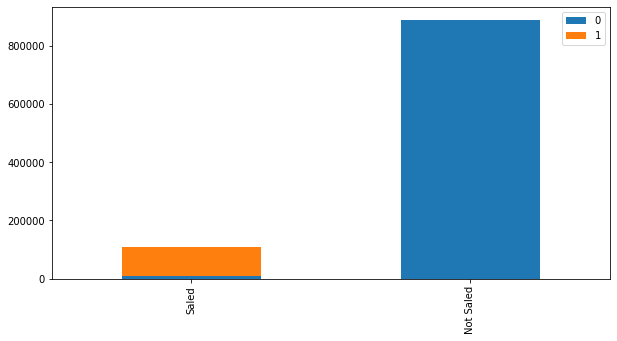

In [197]:
bar_chart('product_price')

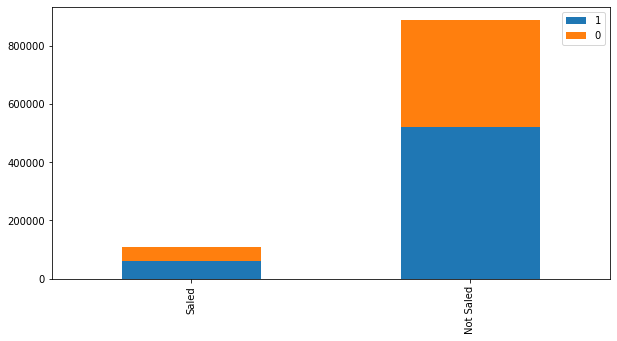

In [198]:
bar_chart('click_timestamp')

In [217]:
for label in train_df:
    case= max(train_df[label].value_counts().keys())
    if type(case) == str and len(case) > 10:
        train_keys = train_df[label].value_counts().keys()
        test_keys = test_df[label].value_counts().keys()
        keys_set = set(train_keys) or set(test_keys)
        keys_mapping = {k:i for i, k in enumerate(keys_set, start=1)}
        test_df[label] = test_df[label].map(keys_mapping)
        train_df[label] = train_df[label].map(keys_mapping)

In [219]:
for label in train_df:
    print(label)
    print(len(train_df[label].value_counts()))

Sales
2
click_timestamp
2
np_click_1week
3719
product_price
2
product_age_group
10
device_type
3
audience_id
10861
product_gender
16
product_brand
22449
product_category(1)
21
product_category(2)
167
product_category(3)
949
product_category(4)
1373
product_category(5)
722
product_category(6)
174
product_category(7)
3
product_country
18
product_id
313844
product_title
192004
partner_id
298
user_id
980924


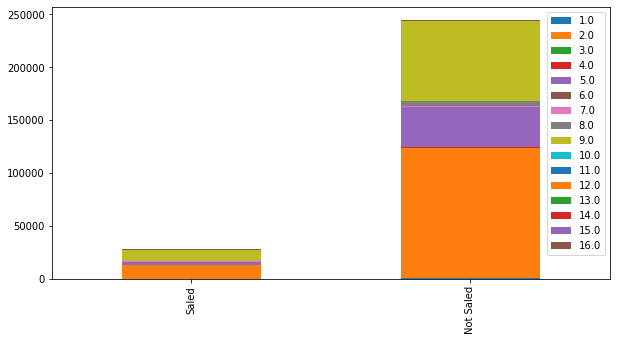

In [220]:
bar_chart('product_gender')

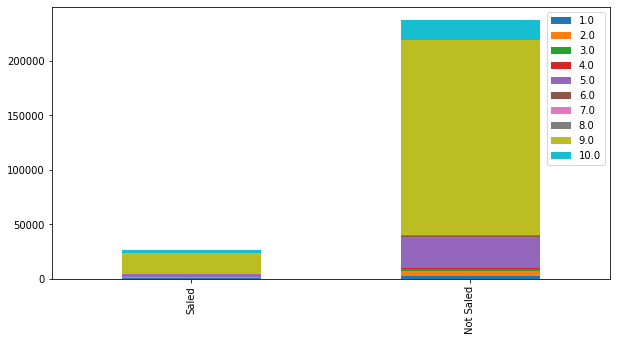

In [221]:
bar_chart('product_age_group')

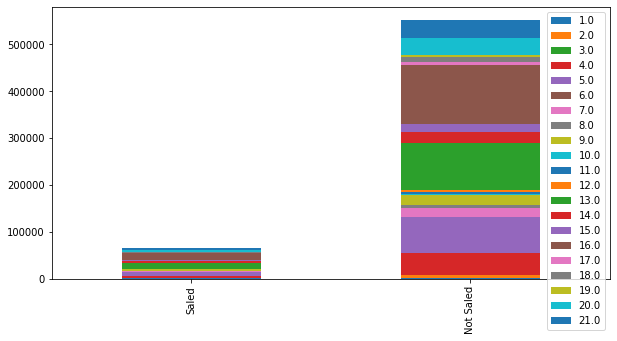

In [222]:
bar_chart('product_category(1)')

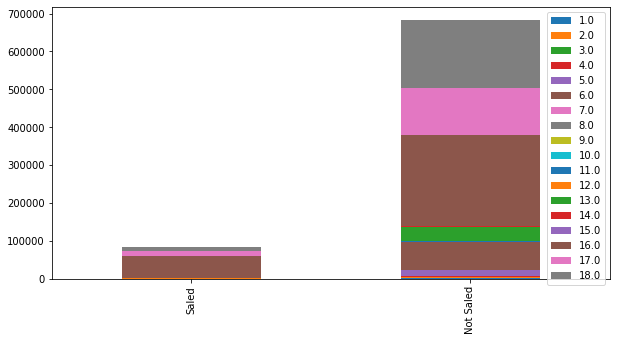

In [223]:
bar_chart('product_country')